In [1]:
import torch
import matplotlib.pyplot as plt

from Operator import Operator
from solve import measure_uc, measure_mchi



In [2]:
def build_field(B):
    """
    The function to build H
    default for z-axis
    Args:
        B: the magnetic field

    Returns:
        H: g μB B

    """

    zero = torch.tensor([0.0])
    g = torch.tensor([1.0, 1.0, 1.0])
    μB = 1.0

    H = torch.cat([zero, zero, B])
    H = μB * g * H
    return H

In [3]:
# 0.1 build steven operators
spin=4.5
op = Operator(spin)

# 0.2 build CEF parameters
B2 = torch.tensor([0.0, 0.0, -0.4536, 0.0, 0.3631])
B4 = torch.tensor([0.0, 0.0, 0.0, 0.0, 0.0089, 0.0, 0.0403, 0.0, 0.0241])
B6 = torch.tensor([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.94e-5, 0.0, 0.0015, 0.0, 0.0008, 0.0, -0.001])

the steven operator for s=4.5 is successfully built


In [4]:
# 1.1 measure u, c
kT = torch.linspace(10, 100, 400)
B0 = torch.tensor([0.0])

u, c = measure_uc(op, kT, B0, build_field, B2, B4, B6)


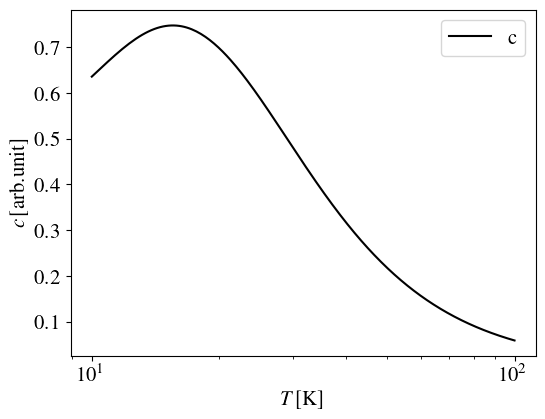

In [5]:
# 1.2. plot
plt.rcParams['figure.figsize'] = (6, 4.5)
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['font.size'] = 15

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath,newtxtext,newtxmath,bm}'
plt.rcParams['font.family'] = 'TeX Gyre Termes'

plt.semilogx(kT.data, c.data, 'k-', label='c')
plt.xlabel(r"$T[\rm{K}]$")
plt.ylabel(r"$c[\rm{arb.unit}]$")

plt.legend()
plt.show()

In [6]:
# 2. measure m, chi

kT = torch.linspace(10, 100, 400)
B0 = torch.tensor([1.0])

m, chi = measure_mchi(op, kT, B0, build_field, B2, B4, B6)


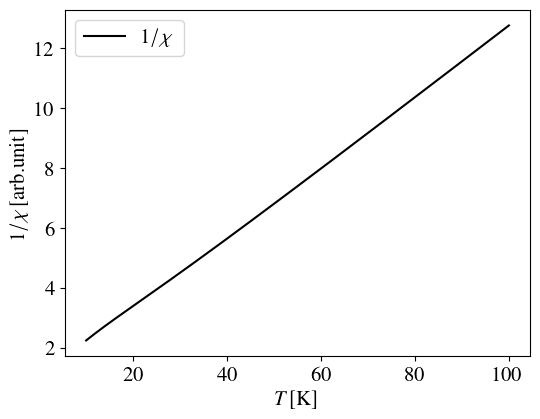

In [7]:
# 2.2. plot
plt.rcParams['figure.figsize'] = (6, 4.5)
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['font.size'] = 15

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath,newtxtext,newtxmath,bm}'
plt.rcParams['font.family'] = 'TeX Gyre Termes'

# plt.semilogx(kT.data, chi.data, 'k-', label='$\chi$')
plt.plot(kT.data, 1.0 / chi.data, 'k-', label='$1 / \chi$')
plt.xlabel(r"$T[\rm{K}]$")
# plt.ylabel(r"$\chi[\rm{arb.unit}]$")
plt.ylabel(r"$1 / \chi[\rm{arb.unit}]$")

plt.legend()
plt.show()